In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from lmfit import Model

plt.style.use("ggplot")

In [2]:
def transmission_sigma_constant(tau, sigma=1):
    """Model for "option 1"."""
    return 1 / (1 + (sigma * tau))


def transmission_sigma_as_func_of_tau(tau, k=1, m=1):
    """Model for "option 2"."""
    return 1 / (1 + (k * (tau ** (1 + m))))


def transmission_sigma_as_func_of_depth(H, s=1):
    """Model for "option 3"."""
    return 1 / (1 + (s / H))


def fit_model(func, df, ind_col, trans_col):
    """Convenience function for fitting models and priting summary statistics.

    Args
        func:      Function to be fit
        df:        Dataframe. Data to fit
        ind_col:   Str. Name of independent variable column in 'df' (e.g. 'tau' 
                   for opions 1 and 2 or 'H' for option 3)
        trans_col: Str. Name of transmission column in 'df'

    Returns
        Model result object from lmfit. Summary stats. are printed.
    """
    model = Model(func, independent_vars=[ind_col])
    kwargs = {ind_col: df[ind_col]}
    fit = model.fit(df[trans_col], **kwargs)
    print(fit.fit_report())
    r2 = 1 - fit.residual.var() / np.var(df[trans_col])
    print(f"R2: {r2:.2f}")

    return fit

def transmission_brune_1953(tau, alpha=1):
    return 0.05 * alpha / (tau**0.5)

/tmp/ipykernel_3703/231979734.py:39: RuntimeWarning: divide by zero encountered in divide
  return 0.05 * alpha / (tau**0.5)


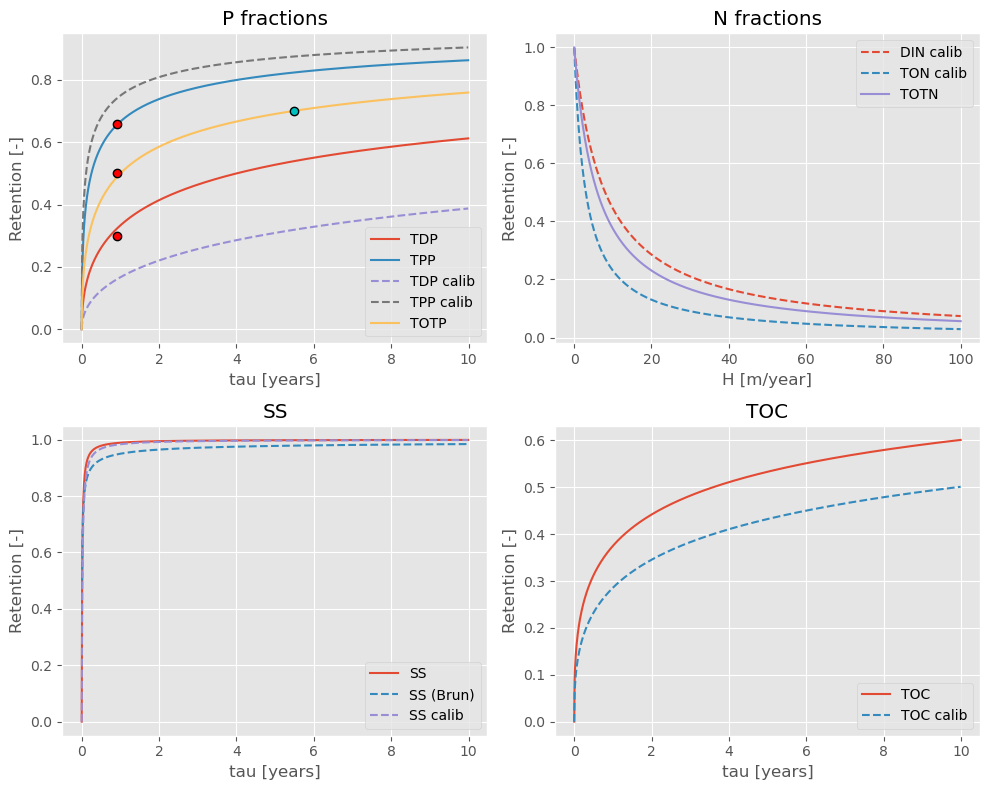

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes = axes.flatten()
tau = np.arange(0, 10, 0.01)
H = np.arange(0.01, 100, 0.01)

# P
ret_tdp = 1 - transmission_sigma_as_func_of_tau(tau, k=0.5, m=-0.5)
ret_tpp = 1 - transmission_sigma_as_func_of_tau(tau, k=2, m=-0.5)
axes[0].plot(tau, ret_tdp, ls="-", label=f"TDP")
axes[0].plot(tau, ret_tpp, ls="-", label=f"TPP")
# axes[0].fill_between(tau, ret_tdp, ret_tpp, alpha=0.2, label="TOTP")

ret_tdp2 = 1 - transmission_sigma_as_func_of_tau(tau, k=0.2, m=-0.5)
ret_tpp2 = 1 - transmission_sigma_as_func_of_tau(tau, k=3, m=-0.5)
axes[0].plot(tau, ret_tdp2, ls="--", label=f"TDP calib")
axes[0].plot(tau, ret_tpp2, ls="--", label=f"TPP calib")
# axes[0].fill_between(tau, ret_tdp2, ret_tpp2, alpha=0.2, label="TOTP")

ret_totp = 1 - transmission_sigma_as_func_of_tau(tau, k=1, m=-0.5)
axes[0].plot(tau, ret_totp, ls="-", label=f"TOTP")

# Plot data from Storefjorden and Mjøsa
axes[0].plot(
    11 / 12,
    0.3,
    marker="o",
    markerfacecolor="r",
    markeredgecolor="k",
)
axes[0].plot(11 / 12, 0.5, marker="o", markerfacecolor="r", markeredgecolor="k")
axes[0].plot(11 / 12, 0.66, marker="o", markerfacecolor="r", markeredgecolor="k")
axes[0].plot(
    5.5,
    0.7,
    marker="o",
    markerfacecolor="c",
    markeredgecolor="k",
)

# N
ret_din = 1 - transmission_sigma_as_func_of_depth(H, s=6)
ret_ton = 1 - transmission_sigma_as_func_of_depth(H, s=1.4)
# axes[1].plot(H, ret_din, ls="-", label=f"DIN")
# axes[1].plot(H, ret_ton, ls="-", label=f"TON")
# axes[1].fill_between(H, ret_din, ret_ton, alpha=0.2, label="TOTN")

ret_din2 = 1 - transmission_sigma_as_func_of_depth(H, s=8)
ret_ton2 = 1 - transmission_sigma_as_func_of_depth(H, s=3)
axes[1].plot(H, ret_din2, ls="--", label=f"DIN calib")
axes[1].plot(H, ret_ton2, ls="--", label=f"TON calib")
# axes[1].fill_between(H, ret_din, ret_ton, alpha=0.2, label="TOTN")

ret_totn = 1 - transmission_sigma_as_func_of_depth(H, s=6)
axes[1].plot(H, ret_totn, ls="-", label=f"TOTN")

# SS
ret_ss = 1 - transmission_sigma_constant(tau, sigma=90)
ret_ss_brun = 1 - transmission_brune_1953(tau)
axes[2].plot(tau, ret_ss, ls="-", label="SS")
axes[2].plot(tau, ret_ss_brun, ls="--", label="SS (Brun)")

ret_ss2 = 1 - transmission_sigma_constant(tau, sigma=60)
axes[2].plot(tau, ret_ss2, ls="--", label="SS calib")

# TOC
ret_toc = 1 - transmission_sigma_as_func_of_tau(tau, k=0.6, m=-0.6)
axes[3].plot(tau, ret_toc, ls="-", label="TOC")

ret_toc2 = 1 - transmission_sigma_as_func_of_tau(tau, k=0.4, m=-0.6)
axes[3].plot(tau, ret_toc2, ls="--", label="TOC calib")

# Labels
axes[0].set_xlabel("tau [years]")
axes[0].set_ylabel("Retention [-]")
axes[0].legend(loc="lower right")
axes[0].set_title("P fractions")

axes[1].set_xlabel("H [m/year]")
axes[1].set_ylabel("Retention [-]")
axes[1].legend(loc="upper right")
axes[1].set_title("N fractions")

axes[2].set_xlabel("tau [years]")
axes[2].set_ylabel("Retention [-]")
axes[2].legend(loc="lower right")
axes[2].set_title("SS")

axes[3].set_xlabel("tau [years]")
axes[3].set_ylabel("Retention [-]")
axes[3].legend(loc="lower right")
axes[3].set_title("TOC")

plt.tight_layout();